## Clustering a Basic Dataset

In this section, you will learn how to use scikit-learn on a toy dataset to:

* generate a toy dataset,
* run clustering algorithms, 
* evaluate their performance. 

### Generating a Toy Dataset

First, generate the toy dataset with the handy `make_blobs` function from `sklearn.datasets`: 

In [78]:
import sklearn.datasets
data, labels = sklearn.datasets.make_blobs(n_samples=1000, random_state=123)

We require 1000 points in total, and specify an integer as `random_state` to get reproducible results. 

Let's get more information on the dataset: 

In [79]:
import numpy as np
print(data.shape, labels.shape)
print(np.unique(labels))

(1000, 2) (1000,)
[0 1 2]


We see that, by default, we have: 

* 1000 samples in total, each of them with two variables, x and y, as requested.
* three classes of samples, automatically labelled to 0, 1, and 2.

Now, plot the sample distribution, using the label value as colour: 

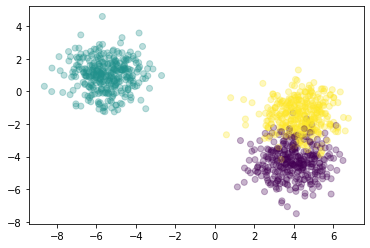

In [80]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.3)

In each blob, the samples follow a 2D normal distribution. They might not look very circular in the plot above because the axis scales are not exactly the same.  

Note that you can ensure reproducible results by specifying an integer as `random_state`, as I did above. 

You can also specify the number of clusters you want, their size, the number of features (or dimensions) of your dataset, and the position of the cluster centers. Check the documentation of make_blobs, and let's do all this to create a 3D dataset: 

In [73]:
data, labels = sklearn.datasets.make_blobs(
    n_samples=500, 
    n_features=3, 
    centers = [
        [0, 0, 0],
        [2, 2, 0], 
        [1, 1, 5]
    ],
    cluster_std = [0.2, 0.2, 1],
    random_state=1234
)

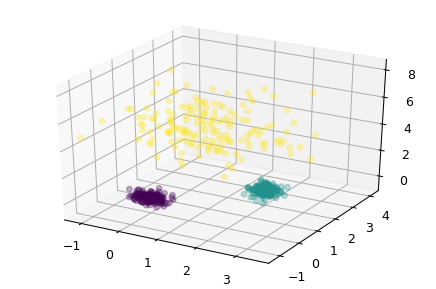

In [75]:
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(dpi=90)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, alpha=0.3)

Ok, let's go back to our 2D dataset, and try to do some clustering! 

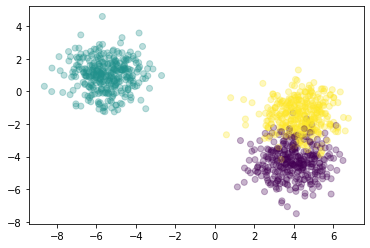

In [81]:
data, labels = sklearn.datasets.make_blobs(n_samples=1000, random_state=123)
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.3)

### Clustering with scikit-learn

Scikit-learn provides a unified interface to widely-used [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). In this section, we will try a few of them. 

We start with [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means), specifying that we want to reconstruct three clusters: 

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1).fit(data)

That's it! the clustering is done already, and the cluster assignments are available in `kmeans.labels_`:

In [100]:
print(kmeans.labels_.shape)
print(kmeans.labels_[:10])

(1000,)
[2 2 2 0 2 2 0 1 2 2]


Let's see the results. We plot the full dataset again but this time, we color the points according to the assigned cluster: 

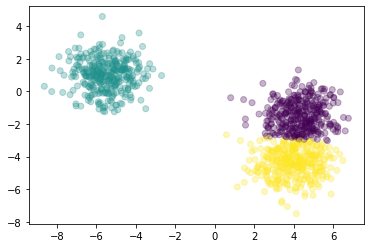

In [101]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, alpha=0.3)

Not bad! Even the two closest clusters are rather well reconstructed. 

---

*Questions and exercise:*

* why are the colors of two clusters inverted? 
* the boundary between the two clusters on the right side looks like a straight line. Do you know why?  
* repeat the clustering several times, asking different numbers of clusters. 

---

Now let's try an [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) with Ward linkage, which is the default:

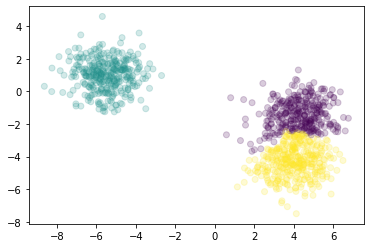

In [136]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=3).fit(data)
plt.scatter(data[:,0], data[:,1], c=ward.labels_, alpha=0.2)

We end up with asymmetric clusters on the right side. 

This is due to the fact that agglomerative clustering algorithms are greedy, which means that a growing cluster keeps growing unless something stops it. The Ward linkage is designed to regulate this effect, but some imbalance usually remains for close clusters, as we see above. 

---

*Exercise*

* Repeat the hierarchical clustering with the single linkage criterion. Check the documentation of [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) to see how to do this technically
* Can you explain what happened? The Wikipedia article on [Single-linkage clustering](https://en.wikipedia.org/wiki/Single-linkage_clustering#Naive_algorithm) might help you. 

---

### Clustering performance

Quantifying the performance of a clustering algorithm is not as obvious as it seems.

First, and most importantly, one needs to know the ground truth, that is the true label for each sample. 

But in practice, clustering is applied in the context of unsupervised learning, because the ground truth is not available. So to quantify performance, one usually needs to resort to manual labeling to define the ground truth for at least a part of the dataset. 

So let's assume we have the ground truth. 

The second question is: How to define a performance metric? 

Intuitively, a good clustering should have the following properties: 

* homogeneity: each cluster only features samples of a single class. 
* completeness: all samples from a given class should end up in the same cluster.

Scikit-learn provides an implementation for the homogenity and completeness scores. Let's evaluate them for the kmeans and ward clustering we have performed above: 


In [122]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score

def scores(true_labels, clustering):
    homogeneity = homogeneity_score(true_labels, clustering.labels_)
    completeness = completeness_score(true_labels, clustering.labels_)
    return homogeneity, completeness

In [123]:
scores(labels, kmeans)

(0.8299931863379524, 0.8301971452849748)

In [124]:
scores(labels, ward)

(0.8191838384947565, 0.8194791349258093)

Both the homogeneity and completeness scores are bounded by 0 and 1, and 1 is perfect. 

Here, we see that the two algorithms perform well, and have similar performance. 

I'm not giving you the definition of homogeneity and completeness here, as this would bring us too far. Indeed, one cannot understand these concepts without a good understanding of information entropy. If you're interested, I suggest you to have a look at these excellent articles, in this order: 

* **An easy and visual introduction to information theory and entropy**: C. Olah, on [his blog](https://colah.github.io/posts/2015-09-Visual-Information/).
* **Definition of the homogeneity and completeness based on entropy**: A. Rosenberg and J. Hirschberg, "V-Measure: A Conditional Entropy-Based External Cluster Evaluation Measure", EMNLP-CoNLL 2007 Proceedings, available [here](https://www.aclweb.org/anthology/D07-1043/).
* **What is entropy?** C. E. Shannon, "A Mathematical Theory of Communication", Bell System Technical Journal 27 (3): 379-423, available [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=2ahUKEwjihrvVpPbnAhVPrxoKHfZgCq8QFjABegQIAhAB&url=http%3A%2F%2Fpeople.math.harvard.edu%2F~ctm%2Fhome%2Ftext%2Fothers%2Fshannon%2Fentropy%2Fentropy.pdf&usg=AOvVaw3JBcHN9o3O4ybH-jFgoKeP)


Finally, another thing that can be done it to compute the confusion matrix between the true and cluster labels. For K-means: 

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
km_matrix = confusion_matrix(labels, kmeans.labels_)
km_matrix

array([[ 32,   0, 302],
       [  0, 333,   0],
       [311,   0,  22]])

In this matrix, the lines correspond to the true labels, and the columns to the cluster labels. For example, there are 334 samples with true label 0, and among them, 302 are reconstructed with cluster label 2, and 32 with cluster label 0.

We can do the same for Ward:

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
wd_matrix = confusion_matrix(labels, ward.labels_)
wd_matrix

array([[ 24,   0, 310],
       [  0, 333,   0],
       [298,   0,  35]])

We can print the size of each reconstructed cluster by summing up the numbers in each column of the matrix: 

In [139]:
km_matrix.sum(axis=0)

array([343, 333, 324])

In [140]:
wd_matrix.sum(axis=0)

array([322, 333, 345])

The confusion matrix tells us a lot about the two close clusters on the right side. Visually, we have seen that the Ward algorithm produces asymmetric clusters. And your eyes might have fooled you into thinking that the two clusters have different sizes. But that's not the case! The imbalance in size between the two clusters is the same with both algorithms. What happens with Ward is that the bottom cluster eats up the center of the top cluster, but the top cluster recovers on the sides. 

This also explains why the homogeneity and completeness scores were so similar. 

In conclusion and as always in data analysis: don't trust the visualization. 

Now, let's try with a much more complicated dataset! 

## Clustering the MNIST handwritten digits dataset

We start by downloading the full MNIST dataset: 

In [184]:
from sklearn.datasets import fetch_openml
raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

The dataset features 70 000 handwritten digits images, with 28x28 = 784 pixels with a single greyscale channel.

In [197]:
print(raw_data.shape)
print(raw_labels[:10])

(70000, 784)
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


The pixel information is flattened into a 1D array. To plot the images, we need to reshape the array to 28x28 pixels.

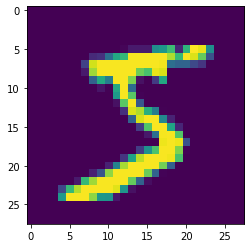

In [198]:
plt.imshow(raw_data[0].reshape(28,28))

In this image, each pixel corresponds to one of the dimensions of the dataset. So our dataset lives in a space with 784 dimensions, and each image corresponds to a point in this space. 

Before doing any clustering, let's preprocess this dataset. We keep only 5000 images so that clustering does not take too long, we normalize the greyscale levels to one, and we convert the labels to integers.

In [265]:
nsamples = 7000
data = raw_data[:nsamples] / 255.
labels = raw_labels[:nsamples].astype('int')

### Clustering in high dimensions

Naively, we can first try to cluster in the original space. Let's try K-Means, and print the homogeneity and completeness scores: 

In [266]:
kmeans = KMeans(n_clusters=10, random_state=1).fit(data)
scores(labels, kmeans)

(0.47862036168689953, 0.49332492678094136)

The performance is not great: Clusters comprise images of different true classes, and the true classes are split between different clusters. 

This is due to the so-called "curse of dimensionality". 5 000 points in a 2D space might seem like a lot, and clusters will be visible. But if you distribute these points in a 784-dimensional space, the points will be very isolated on the average, and it will be quite difficult to get a feeling for the density of points in a given region of space. 

Generally speaking, with more points, you can map higher-dimensional spaces, and you'll get better results if you perform clustering in higher dimensions. 

We have seen several possibilities to reduce the dimensionality of a dataset, and we have seen that t-SNE gives excellent results on the MNIST dataset. So let's project our dataset to two dimensions with t-SNE: 

In [267]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data)

Now, we can display our dataset in 2D. First, we color the points by their ground truth to see what it looks like:

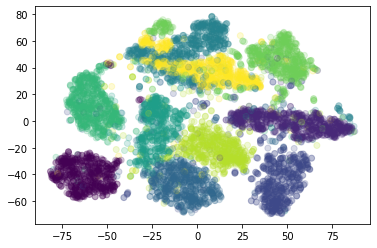

In [268]:
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2)

And we compare with the results of our clustering in the 784-dimensional space: 

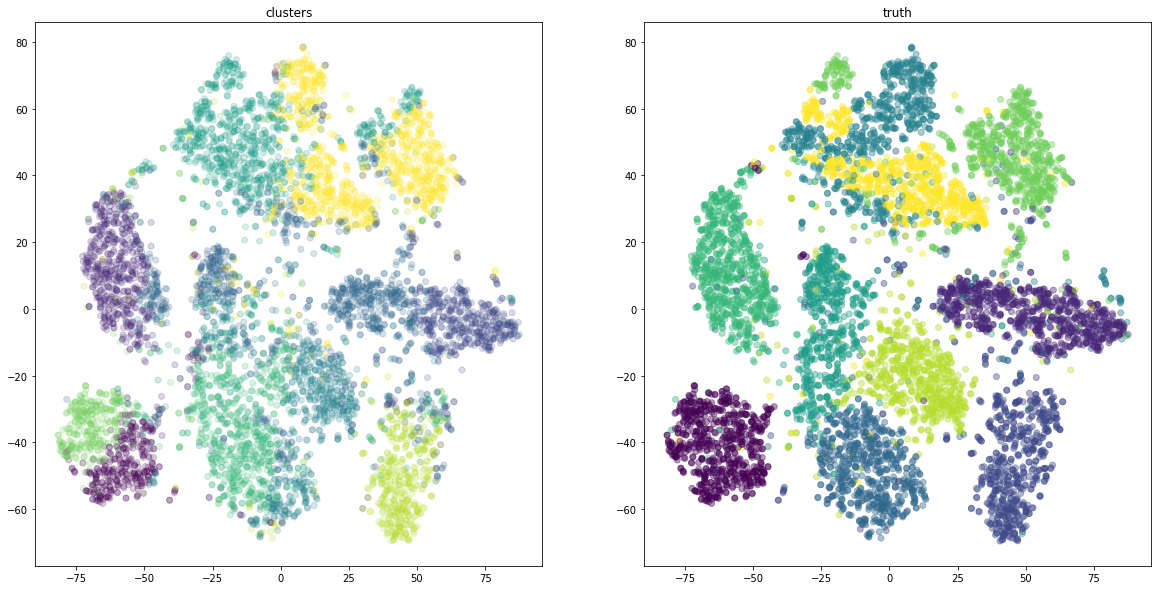

In [269]:
def plot_results(view, true_labels, clustering):
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.scatter(view[:,0], view[:,1], c=clustering.labels_, alpha=0.2)
    plt.title('clusters')
    plt.subplot(122)
    plt.scatter(view[:,0], view[:,1], c=true_labels, alpha=0.4)
    plt.title('truth')
    
plot_results(view, labels, kmeans)

### Clustering after dimensionality reduction

But wait! the clusters are actually very visible after t-SNE, which does a great job at capturing the topology of the dataset manyfold in the 784-dimensional space. So why don't we try to perform clustering in 2D after t-SNE? It's easy: 

In [270]:
kmeans = KMeans(n_clusters=10, random_state=1).fit(view)
scores(labels, kmeans)

(0.7157617822537522, 0.7172331639396936)

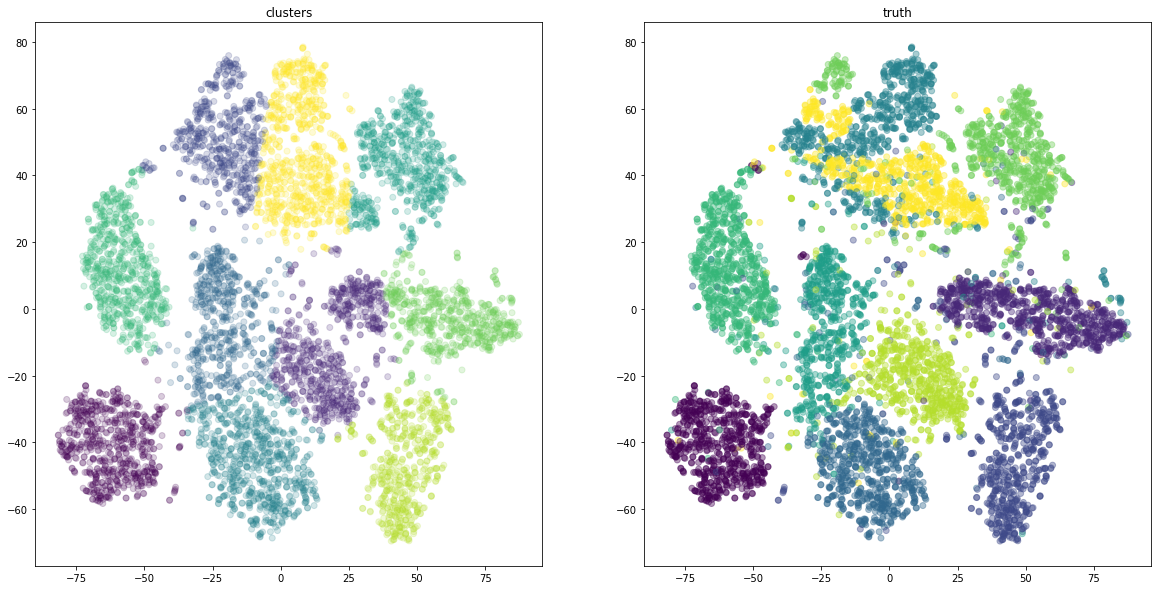

In [271]:
plot_results(view, labels, kmeans)

Much better! 

Still, K-Means only cares about doing a Voronoi tessalation of the space into 10 regions, which are clearly visible here. But this does not work very well here because the true classes are not compactly distributed in the 2D space.

Indeed, if you look again at the ground truth, you'll see that some of the classes are split into several pieces. So K-Means does not have much choice, it will have to group points from different classes in a common cluster (bad homogeneity), and to split samples from the same class in two different clusters to preserve the total number of clusters (bad completeness). 

K-Means wants to reconstruct compact clusters, and has issues with elongated clusters. It does not care about separation by empty space within a cluster. 

### Ward agglomerative clustering

It the Ward hierarchical agglomerative clustering able to do better? 

(0.7974674683955858, 0.7996842481096036)


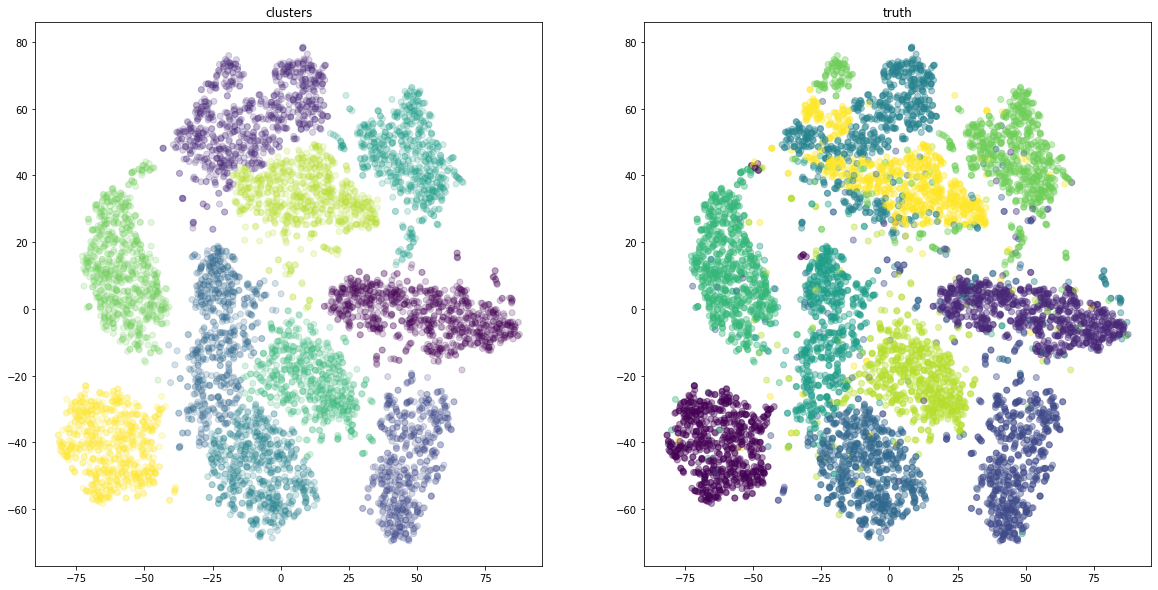

In [279]:
ward = AgglomerativeClustering(n_clusters=10).fit(view)
print(scores(labels, ward))
plot_results(view, labels, ward)

This is as good as it can be! 

But you should note that there is no perfect clustering algorithm. Ward works better if there are many points, and would have issues with a lower number of points. 

Let's check what happens with only 3000 points: 

(0.7458960636787046, 0.7483515995447821)


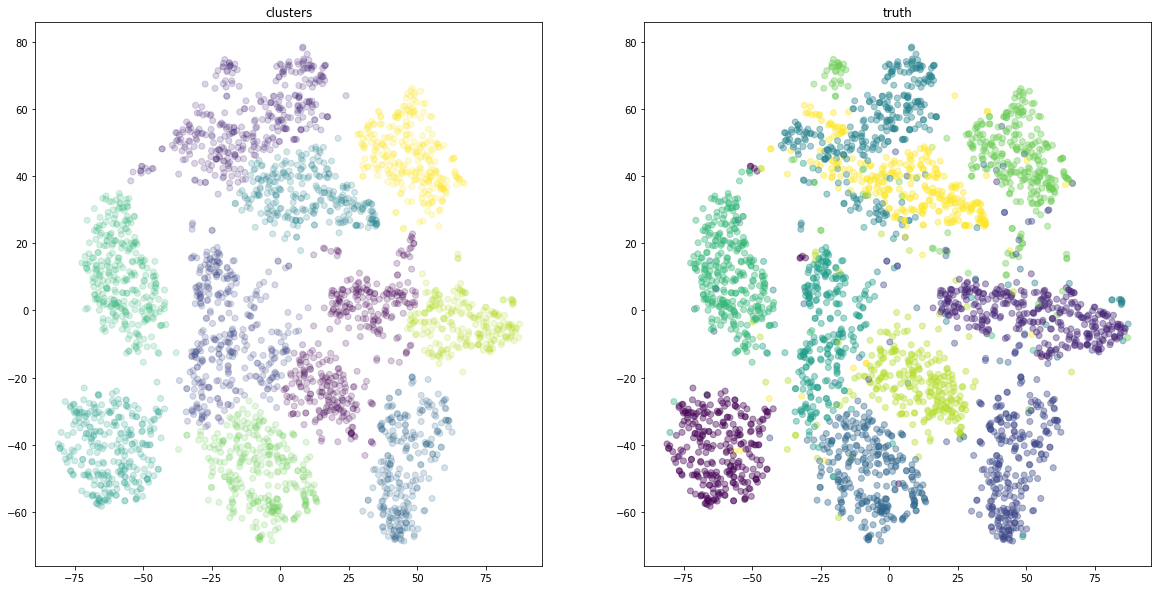

In [278]:
sview = view[:3000]
slabels = labels[:3000]
ward = AgglomerativeClustering(n_clusters=10).fit(sview)
print(scores(slabels, ward))
plot_results(sview, slabels, ward)

In this case, statistical fluctuations drive the algorithm to split the category on the right side, and thus to combine part of this category with another one to preserve the number of clusters. 

### Exercises

We have seen that clustering in the native 784-dimensional space really does not work well, and that it's better to reduce the dimensionality before clustering. 

On the other hand, we see that after the t-SNE projection to 2D, some of the classes have a weird shape, and are even split between different regions of the 2D space. Clearly, this gives clustering a hard time as we require a fixed number of clusters. 

Also, different classes can lead to neighbouring patches in the 2D space. Could they be more separated in a higher-dimensional space? 

An idea to improve clustering could be to: 

* reduce the dimensionality to e.g. 3D, or maybe 20D.
* perform clustering in the intermediate space
* display the results in our 2D view from t-SNE 

#### t-SNE to 3D, Ward clustering, and 2D display

In this exercise, do the following: 

* reduce the dimensionality to 3D with t-SNE
* cluster with the Ward algorithm
* print the scores
* plot the results of the clustering in 2D, using the 2D t-SNE projection we have already calculated

#### PCA to ND, Ward clustering, and 2D display

t-SNE can only project to either 2D or 3D. So if we want to reduce the dimensionality to ND, with N>3, we need to use another dimensionality reduction algorithm like PCA. 

In this exercise, do the following: 

* reduce the dimensionality to 10D with PCA
* cluster with the Ward algorithm 
* print the scores
* plot the results of the clustering in 2D, using the 2D t-SNE projection we have already calculated
* redo this exercise with 20D

